Formation de la table `application` : par chargement des deux tables.

Il nous reste ensuite juste à isoler les ID des lignes de l'une et de l'autre, pour obtenir l'une et l'autre de test et train par un simple filtrage d'index. Ainsi, la mémoire est aussi sauve qu'il se peut.

In [ ]:
import pandas as pd
from home_credit.load import load_raw_table
_application_train = load_raw_table("application_train")
print(_application_train.shape)
_application_test = load_raw_table("application_test")
print(_application_test.shape)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\application_train.pqt
(307511, 122)
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\application_test.pqt
(48744, 121)


In [ ]:
_application_test.insert(1, "TARGET", -1)

In [ ]:
print("same names:", all(_application_train.columns == _application_test.columns))
print("same dtypes:", all(_application_train.dtypes == _application_test.dtypes))

same names: True
same dtypes: True


In [ ]:
import pandas as pd

stacked = pd.concat([_application_train, _application_test], axis=0)
display(stacked)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,-1,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,-1,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,-1,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,-1,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


<Axes: >

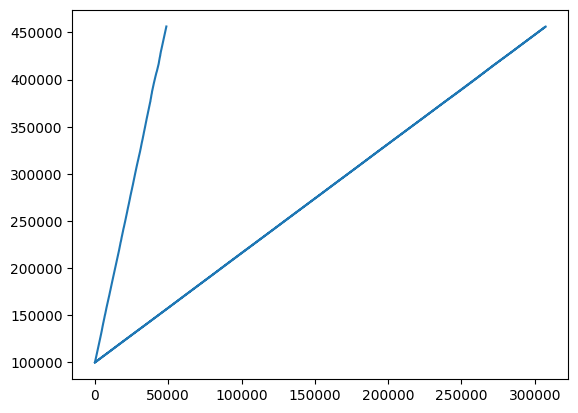

In [ ]:
stacked.SK_ID_CURR.plot()

A revoir

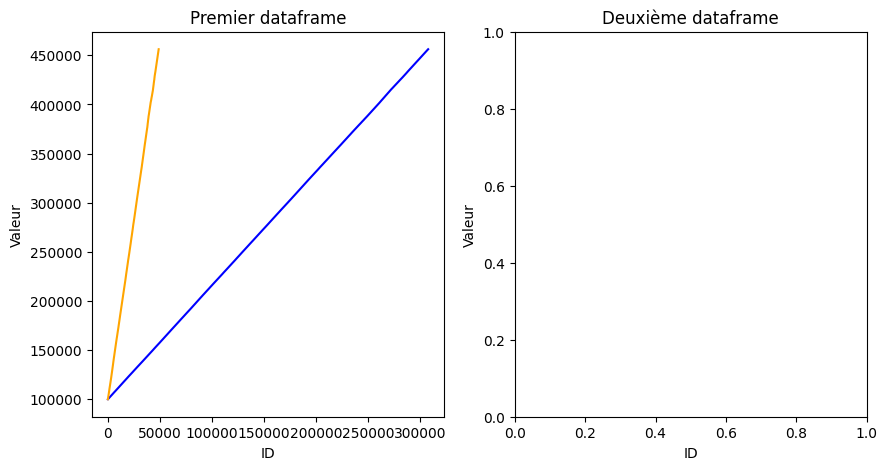

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Créer des exemples de dataframes
#df1 = pd.DataFrame({'ID': [1, 3, 5, 7, 9], 'valeur': [10, 20, 30, 40, 50]})
#df2 = pd.DataFrame({'ID': [2, 4, 6, 8, 10], 'valeur': [60, 70, 80, 90, 100]})

# Créer une figure avec deux sous-graphiques
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Tracer la colonne ID pour chaque dataframe
ax[0].plot(_application_train.SK_ID_CURR, color='blue')
ax[0].plot(_application_test.SK_ID_CURR, color='orange')

# Ajouter des titres et des étiquettes d'axes
ax[0].set_title('Premier dataframe')
ax[0].set_xlabel('ID')
ax[0].set_ylabel('Valeur')
ax[1].set_title('Deuxième dataframe')
ax[1].set_xlabel('ID')
ax[1].set_ylabel('Valeur')

# Afficher le graphique
plt.show()

In [ ]:

_application_train.plot()
_application_test.plot(c='red')


<Axes: >

Error in callback <function _draw_all_if_interactive at 0x0000020A06BD9440> (for post_execute):


KeyboardInterrupt: 

IndexError: list index out of range

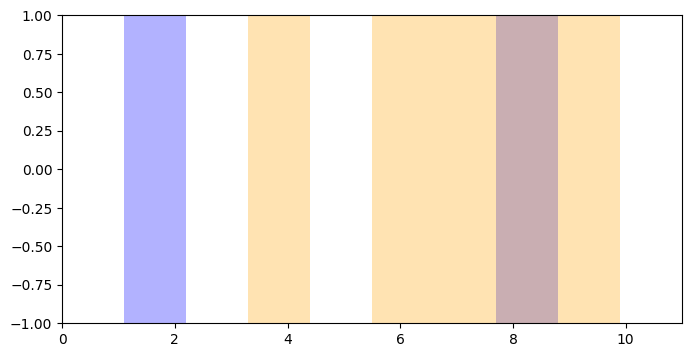

In [ ]:
import matplotlib.pyplot as plt

# les deux ensembles d'ID
ensemble1 = [1, 2, 7, 8]
ensemble2 = [3, 4, 5, 9, 10]

# Initialisation de la figure
fig, ax = plt.subplots(figsize=(8, 4))

# Définition des limites des axes
ax.set_xlim(0, 11)
ax.set_ylim(-1, 1)

# Dessin des rectangles bleus
for i in range(0, len(ensemble1), 2):
    ax.axhspan(-1, 1, xmin=ensemble1[i]/10, xmax=ensemble1[i+1]/10, facecolor='blue', alpha=0.3)

# Dessin des rectangles jaunes
for i in range(0, len(ensemble2), 2):
    ax.axhspan(-1, 1, xmin=ensemble2[i]/10, xmax=ensemble2[i+1]/10, facecolor='orange', alpha=0.3)

# Affichage du résultat
plt.show()

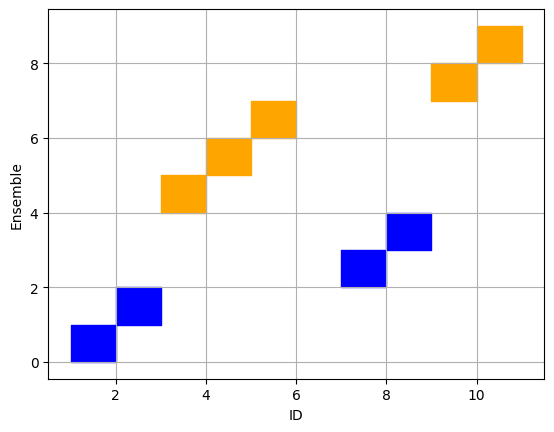

In [ ]:
import matplotlib.pyplot as plt

# Créer les données
id_ensemble_1 = [1, 2, 7, 8]
id_ensemble_2 = [3, 4, 5, 9, 10]
min_id = min(min(id_ensemble_1), min(id_ensemble_2))
max_id = max(max(id_ensemble_1), max(id_ensemble_2))
ids = list(range(min_id, max_id+1))

# Initialiser la figure
fig, ax = plt.subplots()

# Ajouter les sections bleues
for i in range(len(id_ensemble_1)):
    x1, x2 = id_ensemble_1[i], id_ensemble_1[i]+1
    y1, y2 = i, i+1
    ax.fill_between([x1, x2], [y1, y1], [y2, y2], color='blue')

# Ajouter les sections oranges
for i in range(len(id_ensemble_2)):
    x1, x2 = id_ensemble_2[i], id_ensemble_2[i]+1
    y1, y2 = len(id_ensemble_1)+i, len(id_ensemble_1)+i+1
    ax.fill_between([x1, x2], [y1, y1], [y2, y2], color='orange')

# Ajouter les étiquettes des axes
ax.set_xlabel('ID')
ax.set_ylabel('Ensemble')

# Ajouter une grille
ax.grid(True)

# Afficher la figure
plt.show()


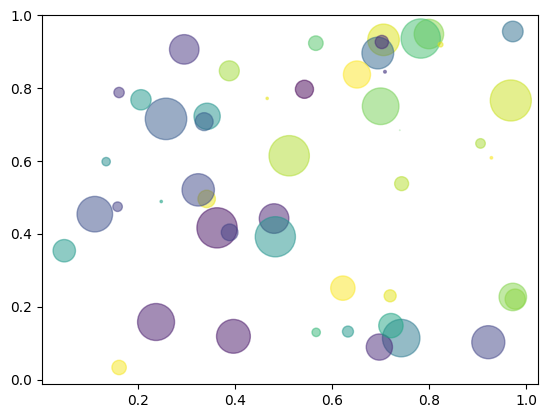

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

Text(0.5, 0, 'Sample index')

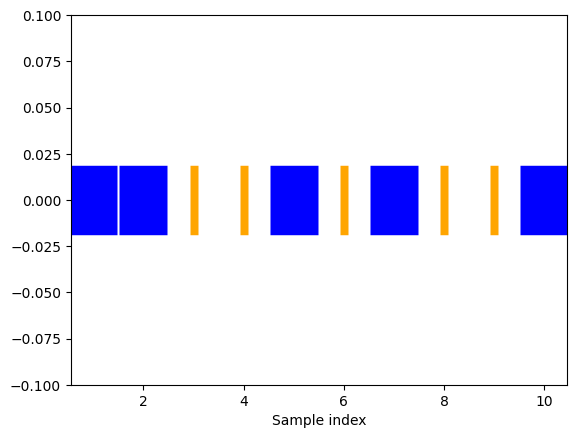

In [ ]:
plt.scatter([1, 2, 5, 7, 10], [0, 0, 0, 0, 0], color='blue', marker="_", lw=50) # , s=34**2
plt.scatter([3, 4, 6, 8, 9], [0, 0, 0, 0, 0], color='orange', marker="_", lw=50)
plt.ylim((-.1, .1))
plt.xlabel("Sample index")

Text(0.5, 0, 'Sample index')

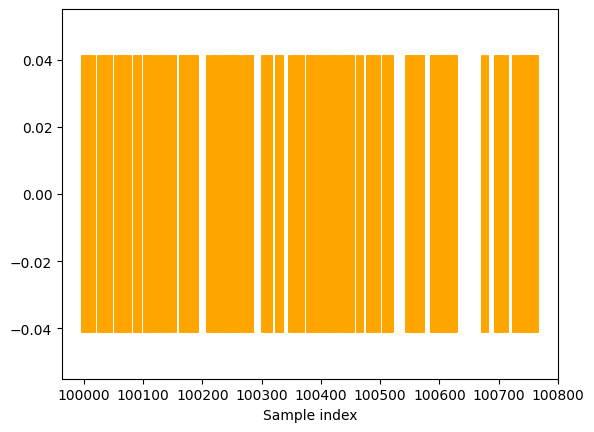

In [ ]:
#train_index = sorted(list(_application_train.SK_ID_CURR))#[:100]
test_index = sorted(list(_application_test.SK_ID_CURR))[:100]
#plt.scatter(train_index, [0] * len(train_index), color='blue', marker="_", lw=200) # , s=34**2
plt.scatter(test_index, [0] * len(test_index), color='orange', marker="_", lw=200)
#plt.ylim((-.1, .1))
plt.xlabel("Sample index")
#print(train_index)
#print(test_index)